In [1]:
%env CUDA_LAUNCH_BLOCKING=1
%load_ext autoreload
%autoreload complete
# %aimport ...

import sys
import importlib
import warnings

importlib.invalidate_caches()

for mod_name in list(sys.modules):
    if not (str.startswith(mod_name, "robotodo") or str.startswith(mod_name, "tensorspecs")):
        continue
    try:
        importlib.reload(sys.modules[mod_name])
    except Exception as error:
        warnings.warn(f"{error}")


env: CUDA_LAUNCH_BLOCKING=1


In [ ]:
from robotodo.engines.isaac._kernel import Kernel

kernel = Kernel([
    "--/log/file=/tmp/todo-isaacsim.log",
    # "--/log/enableStandardStreamOutput=true",
    "--/app/enableStdoutOutput=true",
    # "--no-window",
    # TODO
    # "--/app/content/emptyStageOnStart=false",
    # "--/app/asyncRendering=true",
    # "--enable", "isaacsim.exp.full",


    # TODO
    # "--/app/profilerBackend=cpu",
    # "--/app/profileFromStart=1",
    # "--/plugins/carb.profiler-cpu.plugin/saveProfile=1",
    # "--/plugins/carb.profiler-cpu.plugin/compressProfile=0",
    # "--/plugins/carb.profiler-cpu.plugin/filePath=/tmp/mytrace0",

    # TODO NOTE viewport is the culprit!!!!!
    # "--/app/renderer/skipWhileMinimized=true",
    "--/app/renderer/skipWhileInvisible=true",

    # "--/exts/omni.kit.viewport.window/startup/disableWindowOnLoad=true",
    # "--/exts/omni.kit.viewport.window/startup/dockTabInvisible=false",

], kit_path=__import__("os").path.abspath("./todo-exp.kit"))
# kit_path="isaacsim.exp.base.kit"
kernel.start_app_loop_soon()

[Warning] [simulation_app] Interactive python shell detected but ISAAC_JUPYTER_KERNEL was not set. Problems with asyncio may occur
[Warning] [simulation_app] Please use Isaac Sim Python 3 kernel instead of the default Python 3 Kernel
Loading user config located at: '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Base/5.1/user.config.json'
[0.047s] [ext: omni.kit.async_engine-0.0.3] startup
[0.163s] [ext: omni.metrics.core-0.0.3] startup
[0.163s] [ext: omni.client.lib-1.1.0] startup
[0.176s] [ext: omni.blobkey-1.1.2] startup
[0.177s] [ext: omni.stats-1.0.1] startup
[0.178s] [ext: omni.datastore-0.0.0] startup
[0.182s] [ext: omni.client-1.3.0] startup
[0.238s] [ext: omni.ujitso.default-1.0.0] startup
[0.241s] [ext: omni.hsscclient-1.1.2] startup
[0.249s] [ext: omni.gpu_foundation.shadercache.vulkan-1.0.0] startup
[0.252s] [ext: omni.assets.plugins-0.0.0] startup
[0.255s] [ext: omni.gpu_foundation-0.0.0] startup
[0.265s] [ext: carb.windowing.plugin

In [6]:
kernel.start_app_loop_soon()

In [25]:
%%timeit -n 1
kernel.step_app_loop()

8.26 ms ± 573 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
import omni.kit.hydra_texture as hydra_texture

texture_factory = hydra_texture.acquire_hydra_texture_factory_interface()

In [6]:
import omni

ctx = omni.usd.get_context()


In [7]:
list(ctx.get_stage().Traverse())

[Usd.Prim(</Render>),
 Usd.Prim(</Render/OmniverseKit>),
 Usd.Prim(</Render/OmniverseKit/HydraTextures>),
 Usd.Prim(</Render/OmniverseKit/HydraTextures/omni_kit_widget_viewport_ViewportTexture_0>),
 Usd.Prim(</Render/OmniverseGlobalRenderSettings>),
 Usd.Prim(</Render/Vars>),
 Usd.Prim(</Render/Vars/LdrColor>),
 Usd.Prim(</World>),
 Usd.Prim(</Environment>),
 Usd.Prim(</Environment/defaultLight>),
 Usd.Prim(</OmniverseKit_Persp>),
 Usd.Prim(</OmniverseKit_Front>),
 Usd.Prim(</OmniverseKit_Top>),
 Usd.Prim(</OmniverseKit_Right>)]

In [5]:
for loop_name in ["main", "present", "rendering_0"]:
    print(kernel.get_settings().get(f"/app/runLoops/{loop_name}/rateLimitEnabled"))
    # kernel.get_settings().set(f"/app/runLoops/{loop_name}/rateLimitEnabled", False)

for loop_name in ["present", "rendering_0"]:
    print(kernel.get_settings().get(f"/app/runLoops/{loop_name}/syncToPresent"))
    # print(kernel.get_settings().set(f"/app/runLoops/{loop_name}/syncToPresent", False))

False
True
True
None
True


In [ ]:
import omni

# TODO NOTE
for viewport in (omni.kit.viewport.window.get_viewport_window_instances()):
    (viewport.visible) = False

In [31]:
s = kernel.get_settings()
d = s.get_settings_dictionary()
d["app"]["renderer"]

{'resolution': {'list': (3840,
   2160,
   2048,
   1080,
   1920,
   1080,
   1280,
   720,
   1024,
   1024,
   512,
   512),
  'multiplierList': (2.0, 1.0, 0.666666666666, 0.5, 0.333333333333, 0.25),
  'height': 720,
  'width': 1280},
 'skipWhileMinimized': False,
 'sleepMsOnFocus': 0,
 'sleepMsOutOfFocus': 0,
 'skipWhileInvisible': True,
 'skipMaterialLoading': False,
 'skipMaterialLoadingRegex': '',
 'allowMaterialLoadingRegex': ''}

In [ ]:
d["exts"]["omni.kit.viewport.window"]["startup"]

{'windowName': 'Viewport',
 'disableWindowOnLoad': False,
 'dockTabInvisible': True,
 'singleTabGroup': False,
 'windowNames': {},
 'showOnLaunch': {}}

In [3]:
# TODO 
from robotodo.engines.isaac.builder import load_usd_scene

# TODO set up axis
scene = await load_usd_scene(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/default_environment.usd",
    # "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/gridroom_black.usd",
    _kernel=kernel,
)

2025-10-14T03:32:30Z [28,928ms] [Error] [carb.graphics-vulkan.plugin] Could not get NGX parameters block because NGX isn't enabled.
2025-10-14T03:32:30Z [28,928ms] [Error] [carb.graphics-vulkan.plugin] Failed to create NGX context.
2025-10-14T03:32:31Z [29,065ms] [Error] [rtx.optixdenoising73.plugin] Failed to create an Optix adaptor for device 0


In [4]:
from robotodo.engines.isaac.scene import Scene
from robotodo.engines.isaac.builder import load_urdf, load_usd, build_camera
from robotodo.utils.pose import Pose


# scene = Scene(_kernel=kernel)


# panda = await load_urdf(
#     "./todo-curobo-sample-configs/franka/franka_description/franka_panda.urdf", 
#     scene=scene, 
#     fix_root_link=True,
# )


mug = await load_usd(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Props/Mugs/SM_Mug_A2.usd",
    scene=scene,
)

mug.collidable = True
mug.rigid_body.enabled = True
mug.pose = Pose(p=[.5, .5, .5])



[42.188s] [ext: omni.usd.schema.metrics.assembler-107.3.1] startup
[42.192s] [ext: omni.usd.metrics.assembler-107.3.1] startup


In [5]:
cam = await build_camera(scene=scene)
# cam.pose = Pose.from_lookat([1, 1, 1], p_target=[0, 0, 0])
# cam.pose = Pose.from_lookat([1, 1, 1], p_target=panda.link_poses[..., -1].p)
cam.pose = Pose.from_lookat([1, 1, 1], p_target=mug.pose.p)

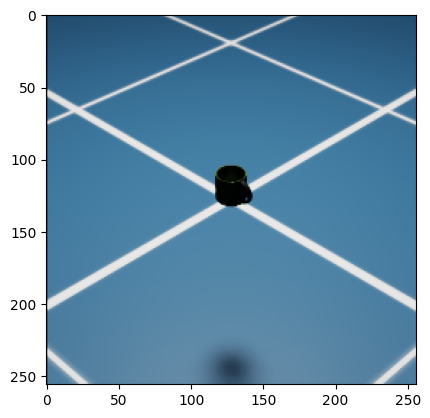

In [10]:

import matplotlib.pyplot as plt

# kernel.step_app_loop()
cam.pose = Pose.from_lookat([2, 2, 2], p_target=mug.pose.p)
plt.imshow((await cam.read_rgba())[0].cpu())

In [17]:
import numpy



import matplotlib.pyplot as plt

cam.pose = Pose.from_lookat(
    numpy.random.randint(1, 10, size=3),
    p_target=mug.pose.p,
)
# kernel.step_app_loop()
plt.imshow(cam.read_rgba()[0].cpu())

ValueError: Invalid object in Py_Graph in getWrappedGraphFromNode

ValueError: Invalid object in Py_Graph in getWrappedGraphFromNode

In [179]:
import omni
omni.timeline.acquire_timeline_interface().is_playing()

False

In [169]:
%timeit -n 10 kernel.step_app_loop()


78.4 ms ± 1.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [104]:
# # manually flush the fabric data to update Hydra textures
# # self.forward()
# # render the simulation
# # note: we don't call super().render() anymore because they do above operation inside
# #  and we don't want to do it twice. We may remove it once we drop support for Isaac Sim 2022.2.
kernel.get_settings().set("/app/player/playSimulations", False)
kernel._app_framework.update()
# kernel.get_settings().set("/app/player/playSimulations", True)

# self.set_setting("/app/player/playSimulations", False)
# self._app.update()
# self.set_setting("/app/player/playSimulations", True)

In [74]:

s = kernel.get_settings()

%timeit -n 100 s.set("/app/player/playSimulations", False)

817 ns ± 87.9 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [65]:
import omni

timeline = omni.timeline.acquire_timeline_interface()
timeline.is_playing()

False

In [66]:
kernel.hacky_ensure_render()

In [54]:
await scene.step()

In [58]:
kernel.step_app_loop()

In [7]:
import omni

timeline = omni.timeline.acquire_timeline_interface()
timeline.set_auto_update(False)

In [10]:
timeline.stop()
timeline.is_stopped()

False

In [48]:
timeline.pause()

In [8]:
timeline.play()
timeline.is_playing(), timeline.is_auto_updating()

(False, False)

2025-10-11T11:04:52Z [34,433ms] [Error] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplification) cannot be a part of a dynamic body, falling back to convexHull approximation: /_02.For dynamic collision please use approximations : convex hull, convex decomposition, box, sphere or SDF approximation.


In [63]:
timeline.is_auto_updating()

True

In [30]:
timeline.forward_one_frame?

Docstring:
forward_one_frame(self: omni.timeline._timeline.ITimeline) -> None


Forwards the timeline by one frame.
Type:      method

In [67]:
timeline.play()
timeline.is_playing(), timeline.is_auto_updating()


(False, True)

In [42]:
# timeline.pause()
timeline.stop()

In [17]:
timeline.forward_one_frame()

2025-10-11T09:50:48Z [531,246ms] [Error] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplification) cannot be a part of a dynamic body, falling back to convexHull approximation: /_02.For dynamic collision please use approximations : convex hull, convex decomposition, box, sphere or SDF approximation.


In [38]:
timeline.is_auto_updating()

True

In [27]:
# timeline.set_auto_update(False)
timeline.set_auto_update(True)

In [29]:
timeline.forward_one_frame()

In [69]:
await scene.step()

In [35]:
omni.replicator.core.AnnotatorRegistry?

Init signature: omni.replicator.core.AnnotatorRegistry()
Docstring:      Registry of annotators providing groundtruth data to writers.
File:           ~/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Full/5.0/exts/3/omni.replicator.core-1.12.17+107.3.1.lx64.r.cp311/omni/replicator/core/scripts/annotators.py
Type:           type
Subclasses:     

In [15]:
# TODO
import omni
omni.replicator.core.orchestrator.preview()

In [14]:
omni.replicator.core.orchestrator.get_status()

<Status.STOPPED: 0>

In [ ]:
omni.replicator.core.orchestrator.set_capture_on_play

In [38]:
omni.replicator.core.orchestrator.run()

In [16]:
kernel.get_settings().get("/app/player/playSimulations")


True

In [8]:
import omni

# TODO 
kernel.get_settings().set("/app/player/playSimulations", False)
timeline = omni.timeline.acquire_timeline_interface()
timeline.play()
timeline.stop()
kernel.get_settings().set("/app/player/playSimulations", True)


2025-10-11T11:13:03Z [30,964ms] [Error] [omni.physx.plugin] PhysicsUSD: Parse collision - triangle mesh collision (approximation None/MeshSimplification) cannot be a part of a dynamic body, falling back to convexHull approximation: /_02.For dynamic collision please use approximations : convex hull, convex decomposition, box, sphere or SDF approximation.
